In [ ]:
n = 4;

In [ ]:
coord = {x,y,z,t};

In [ ]:
metric = DiagonalMatrix[{a[t]^2 E^(2\[Zeta][coord]),a[t]^2 E^(2\[Zeta][coord]),a[t]^2 E^(2\[Zeta][coord]),-NN[coord]^2}];


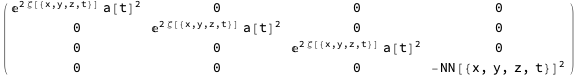

In [ ]:
metric // MatrixForm


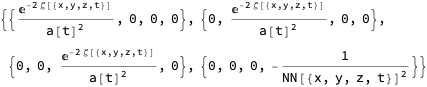

In [ ]:
inversemetric = Inverse[metric]

In [ ]:
affine := 
    affine = Simplify[Table[1/2 * Sum[inversemetric[[i,s]]
                                      (D[metric[[j,s]],coord[[k]]] + D[metric[[k,s]],coord[[j]]] - D[metric[[j,k]],coord[[s]]])
                                     ,{s,n}]
                           ,{i,n},{j,n},{k,n}]
                     ]

In [ ]:
listaffine := Table[If[UnsameQ[affine[[i,j,k]],0],
                       {ToString[\[CapitalGamma][i,j,k]],affine[[i,j,k]]}
                      ]
                   ,{i,n},{j,n},{k,n}]


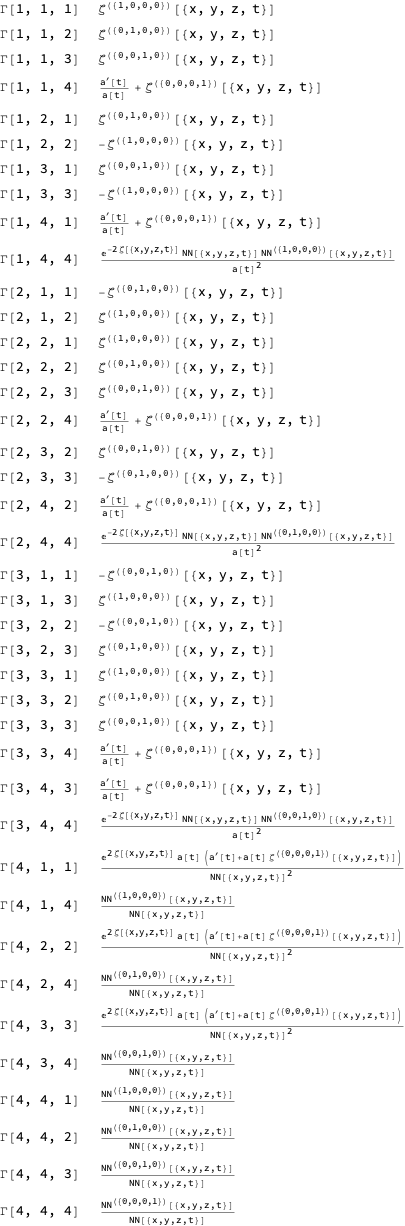

In [ ]:
TableForm[Partition[
    DeleteCases[Flatten[listaffine]
               ,Null]
,2]
         ,TableSpacing->{2,2}]

In [ ]:
riemann :=
    riemann = Simplify[Table[
        D[affine[[i,j,l]],coord[[k]]] - D[affine[[i,j,k]],coord[[l]]]
        + Sum[
            affine[[s,j,l]]affine[[i,k,s]] - affine[[s,j,k]]affine[[i,l,s]]
        ,{s,n}]
    ,{i,n},{j,n},{k,n},{l,n}]
                      ]

In [ ]:
listriemann := Table[If[UnsameQ[riemann[[i,j,k,l]],0],
                       {ToString[R[i,j,k,l]], riemann[[i,j,k,l]]}
                      ]
                   ,{i,n},{j,n},{k,n},{l,n}]


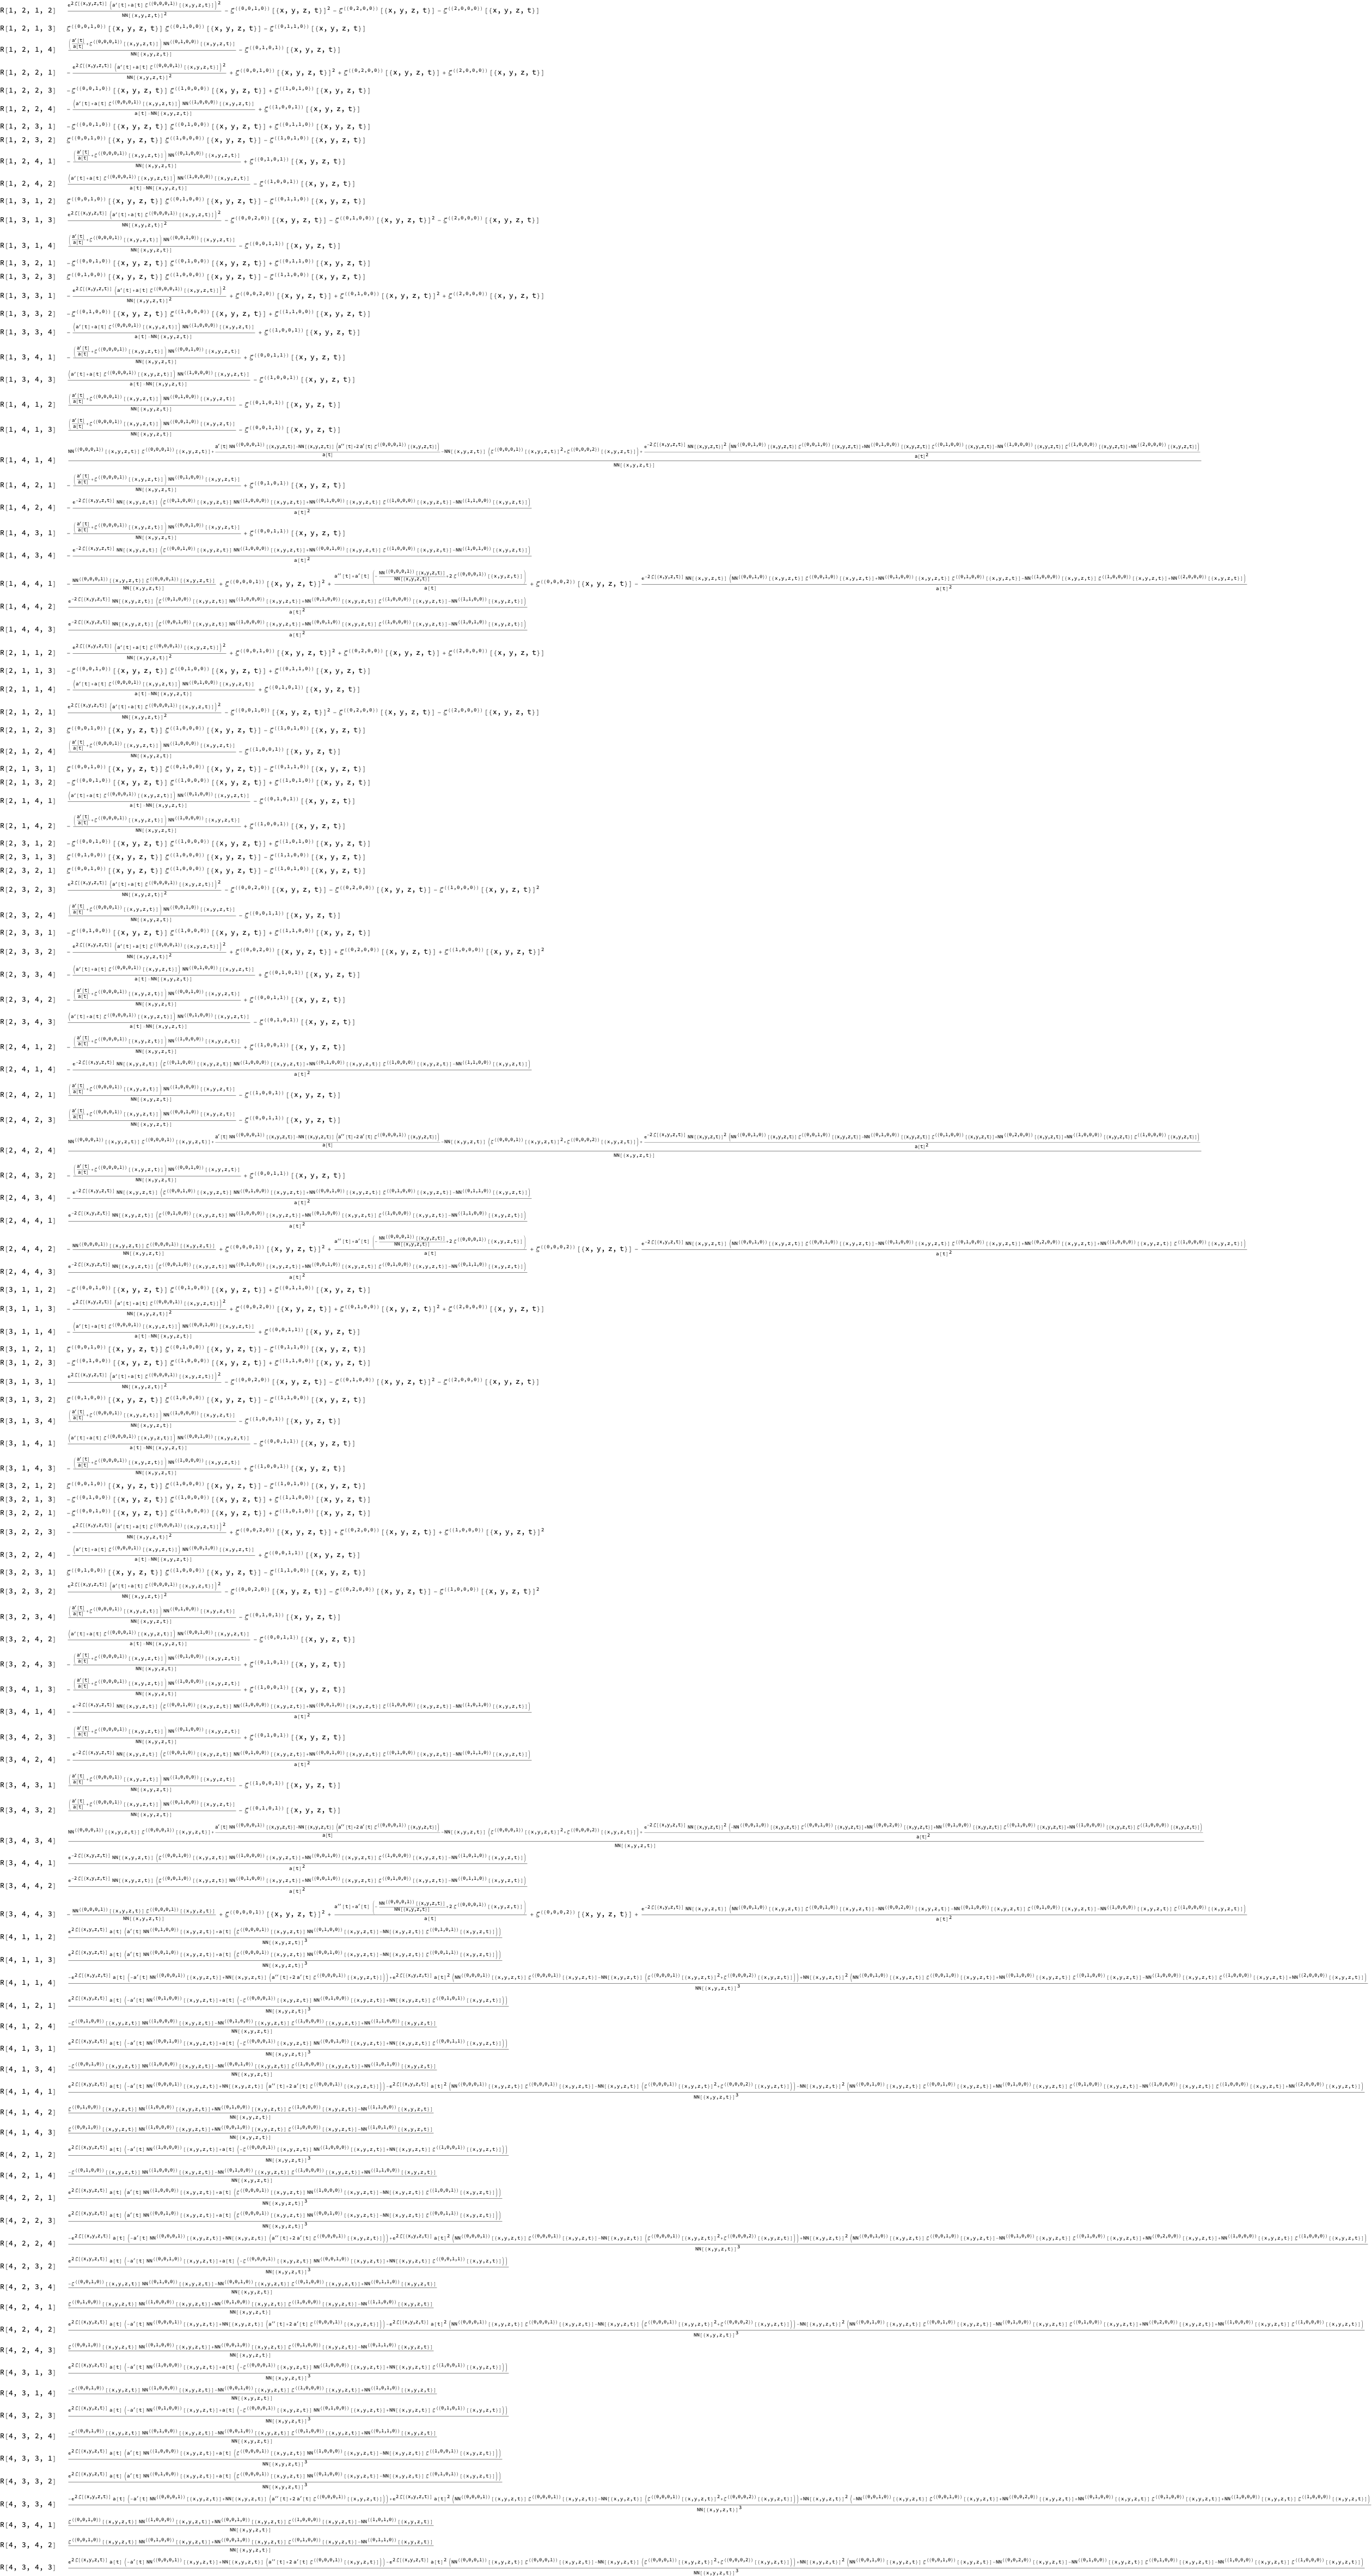

In [ ]:
TableForm[Partition[
    DeleteCases[Flatten[listriemann]
               ,Null]
,2]
         ,TableSpacing->{2,2}]

In [ ]:
ricci :=
    ricci = Simplify[
        Table[
            Sum[
                riemann[[i,j,i,l]]
            ,{i,n}]
        ,{j,n},{l,n}]
    ]

In [ ]:
listricci := Table[If[UnsameQ[ricci[[i,j]],0],
                       {ToString[R[i,j]], ricci[[i,j]]}
                      ]
                   ,{i,n},{j,n}]


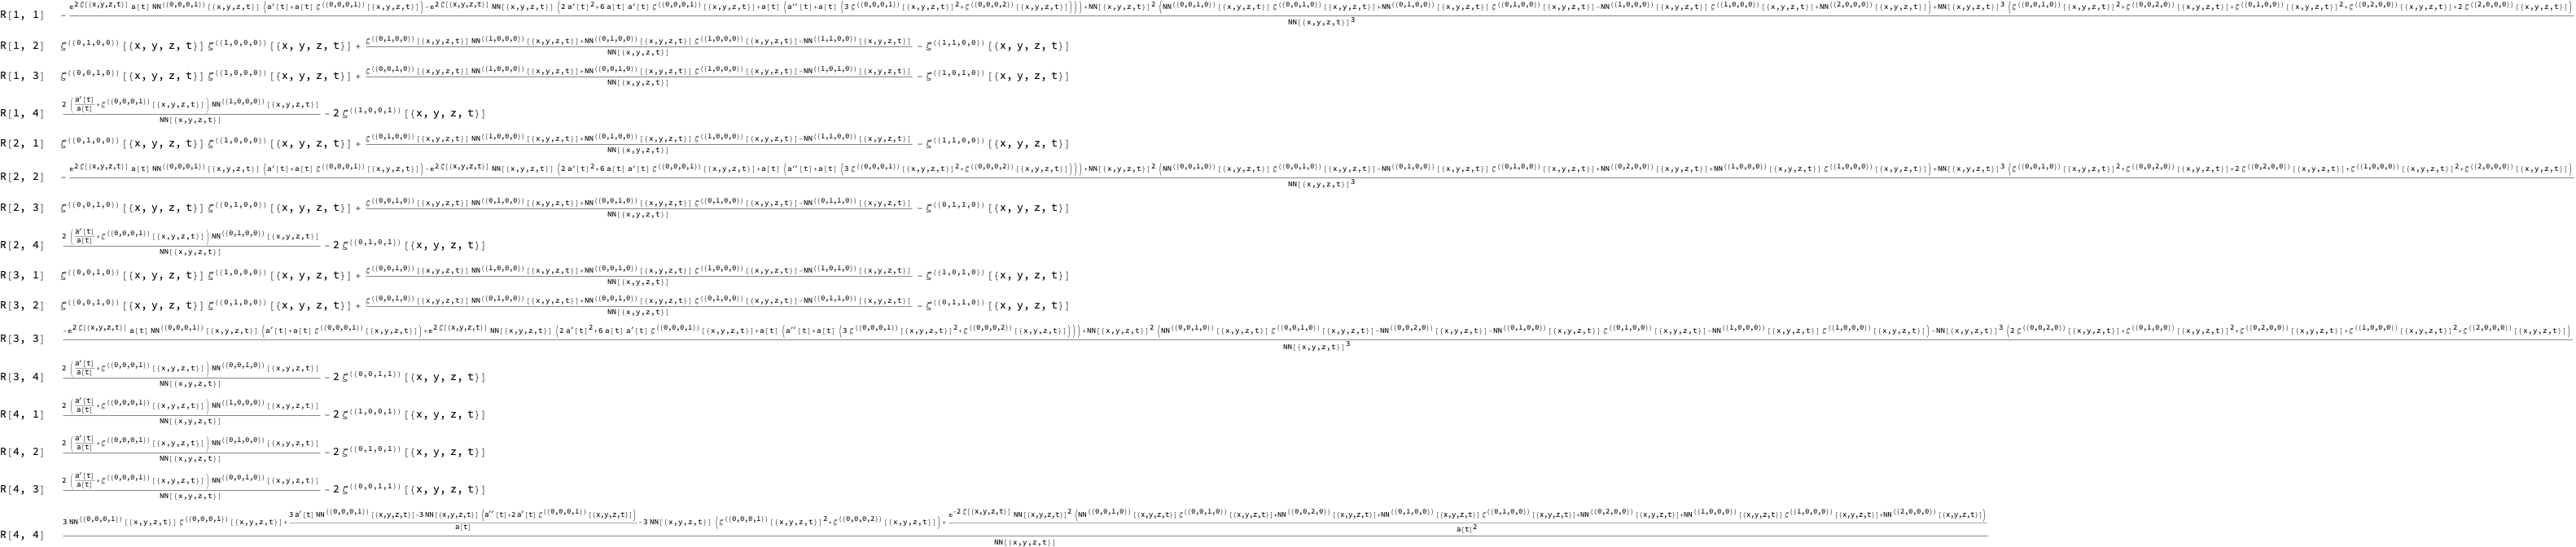

In [ ]:
TableForm[Partition[
    DeleteCases[Flatten[listricci]
               ,Null]
,2]
         ,TableSpacing->{2,2}]


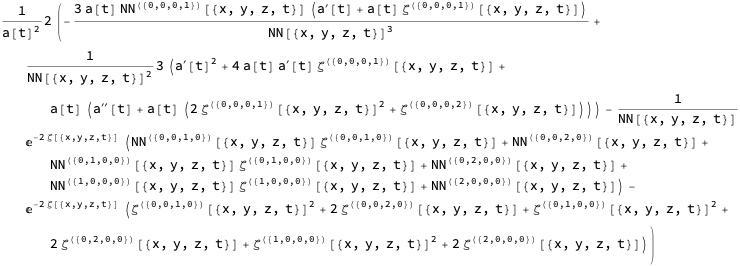

In [ ]:
scalar = Simplify[
    Sum[
        inversemetric[[i,j]]ricci[[i,j]]
    ,{i,n},{j,n}]
]


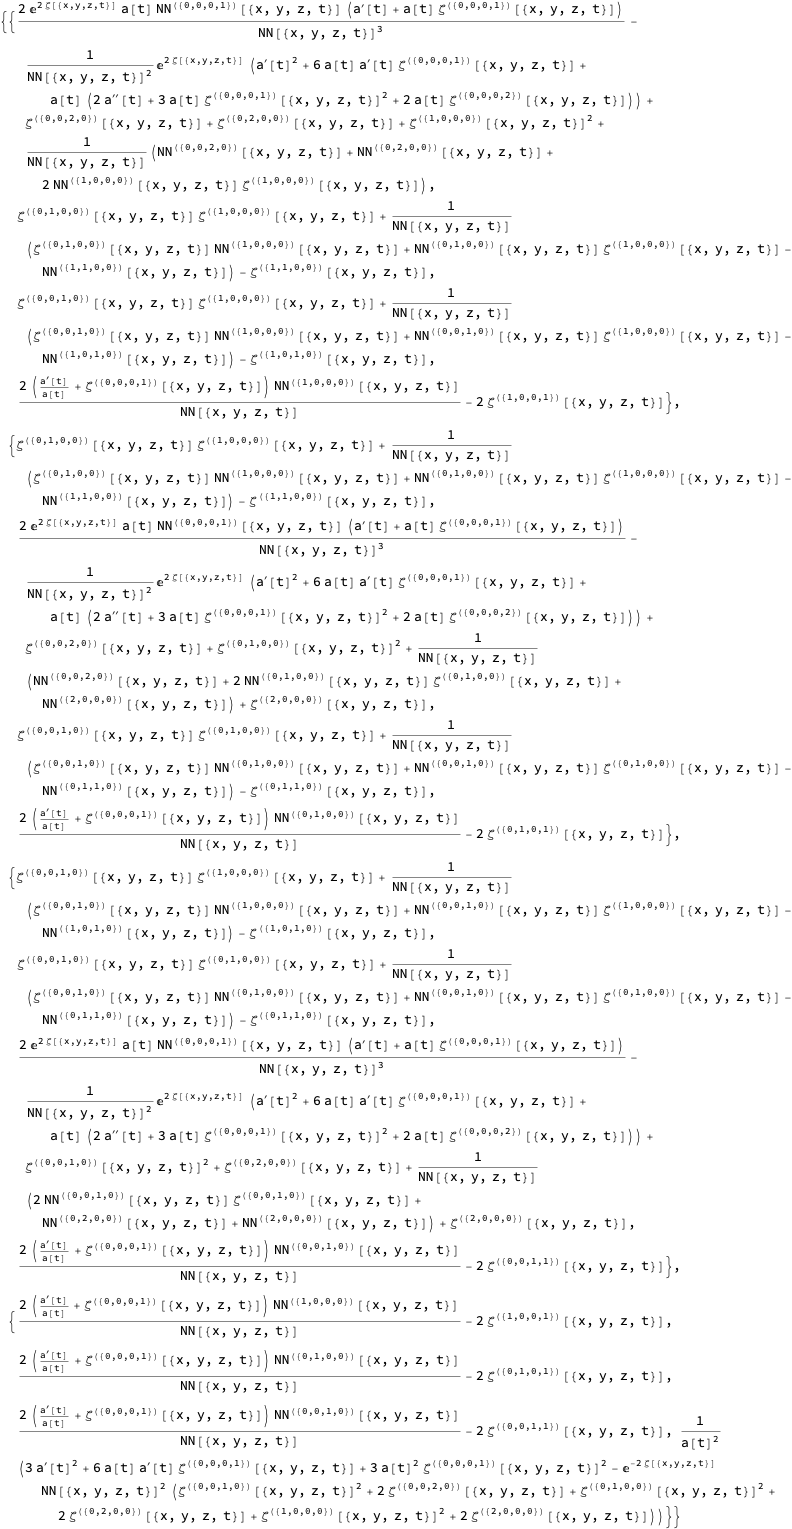

In [ ]:
einstein = Simplify[ricci - 1/2 metric scalar]


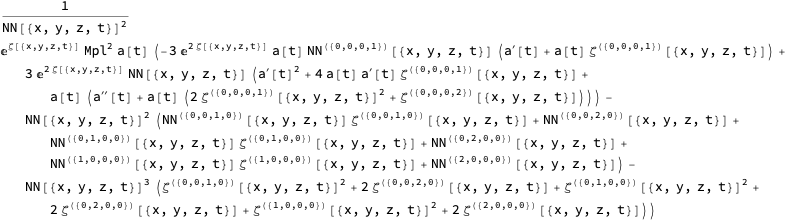

In [ ]:
Lag = Simplify[(Mpl^2/2 scalar) Sqrt[-Det[metric]], {a[t]>0,NN[coord]>0,\[Zeta][coord]\[Element]Reals,H>0,t\[Element]Reals}]


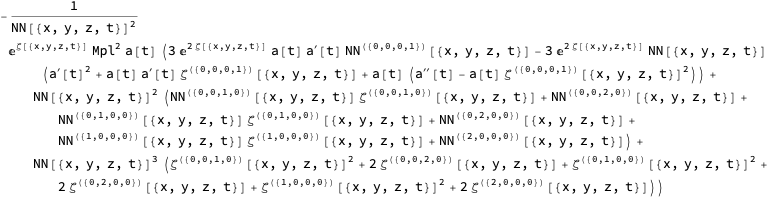

In [ ]:
LagImp = Simplify[Lag - D[\[Zeta][coord],t,t] D[Lag,D[\[Zeta][coord],t,t]] - D[\[Zeta][coord],t] D[D[Lag,D[\[Zeta][coord],t,t]],t]]


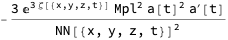

In [ ]:
D[LagImp,D[NN[coord],t]]

In [ ]:
pi = Simplify[D[LagImp,D[\[Zeta][coord],t]]]


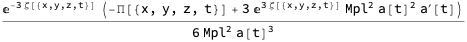

In [ ]:
zdotsol = D[\[Zeta][coord],t] /. Solve[\[CapitalPi][coord] == pi, D[\[Zeta][coord],t]][[1]]


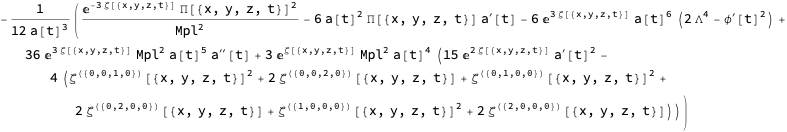

In [ ]:
Simplify[\[CapitalPi][coord] D[\[Zeta][coord],t] - LagImp /. {D[\[Zeta][coord],t]->zdotsol}]